# Matplotlib

- Underpins many plotting libraries (Seaborn, pandas .plot)
- Two APIs: Stateful (plt.plot(...)) and object-oriented ( OO ) 
( fig, ax = plt.subplots(); ax.plot(...) ). 
- We'll prefer OO for clirity and scalability.
- Figures (the canvas) vs Axes (Individual plot area).


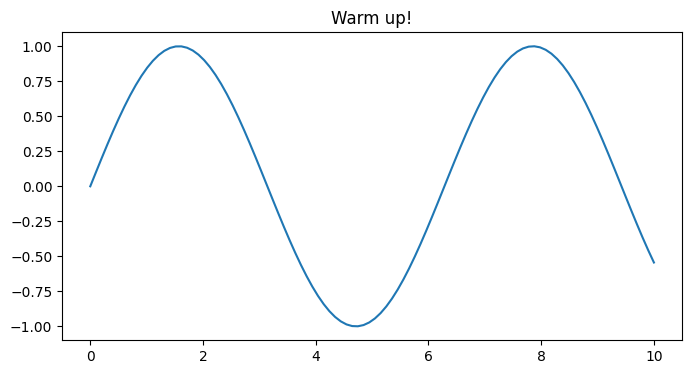

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nice, readable default size for demos
plt.rcParams["figure.figsize"] = (8, 4)

# Quick sanity plot
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.title("Warm up!")
plt.show()

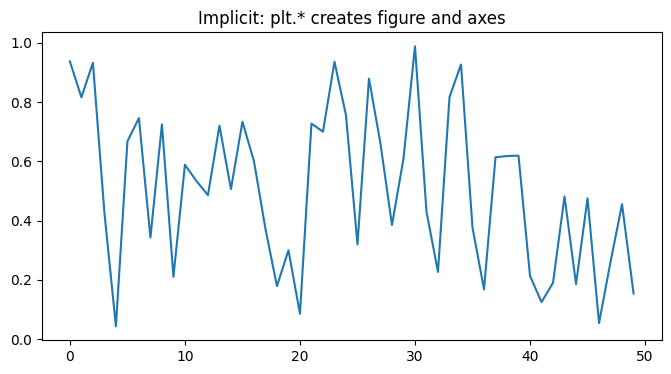

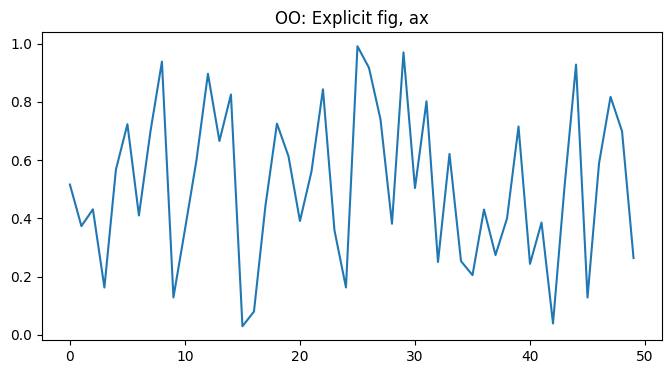

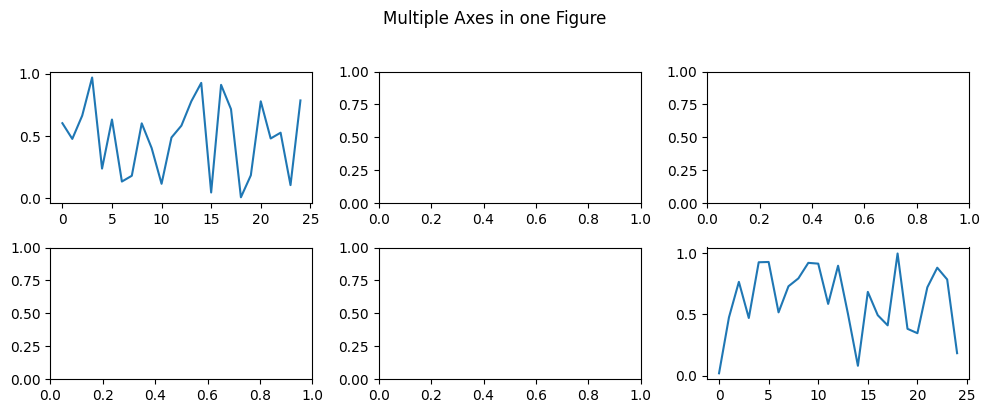

In [3]:
# Stateful - implicit figure/axes
plt.plot(np.random.rand(50))
plt.title("Implicit: plt.* creates figure and axes")
plt.show()

# Object Oriented (OO) explicit figure/axes
fig, ax = plt.subplots()
ax.plot(np.random.rand(50))
ax.set_title("OO: Explicit fig, ax")
plt.show()

# Grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 4))
axes[0, 0].plot(np.random.rand(25))
axes[1, 2].plot(np.random.rand(25))
fig.suptitle("Multiple Axes in one Figure", y=1.02)
plt.tight_layout()
plt.show()


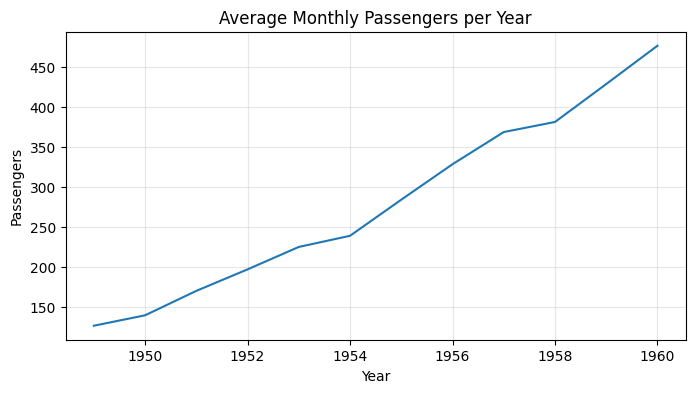

In [4]:
# Core plots with Seaborn datasets

## Line plot

flights = sns.load_dataset("flights") # columns: year, month, passengers

# Pivot to make a time-like index (year-month)
df_f = flights.pivot(index="year", columns="month", values="passengers")

fig, ax = plt.subplots()
ax.plot(df_f.index, df_f.mean(axis=1))
ax.set_title("Average Monthly Passengers per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers")
ax.grid(True, alpha=0.3)
plt.show()

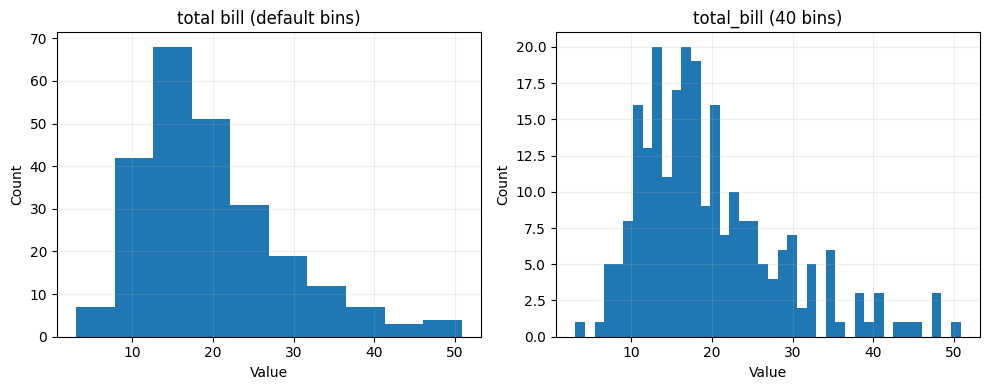

In [5]:
tips = sns.load_dataset("tips").dropna(subset=["total_bill", "tip"])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(tips["total_bill"])
axes[0].set_title("total bill (default bins)")

axes[1].hist(tips["total_bill"], bins=40)
axes[1].set_title("total_bill (40 bins)")

for ax in axes:
    ax.set_xlabel("Value"); ax.set_ylabel("Count"); ax.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

/var/folders/hd/wvpfmg893d9ff7g872_k6hvh0000gn/T/ipykernel_57132/43625875.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_by_species, labels=species)


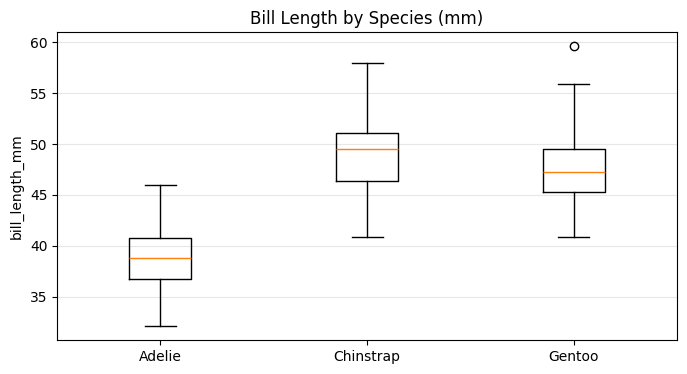

In [6]:
penguins = sns.load_dataset("penguins").dropna(subset=["species", "bill_length_mm"])

# Prepare a list of series for wach category (Matplotlib boxplot uses lists/arrays)
species = penguins["species"].unique()
data_by_species = [penguins.loc[penguins["species"] == s, "bill_length_mm"] for s in species]

fig, ax = plt.subplots()
ax.boxplot(data_by_species, labels=species)
ax.set_title("Bill Length by Species (mm)")
ax.set_ylabel("bill_length_mm")
ax.grid(axis="y", alpha=0.3)
plt.show()

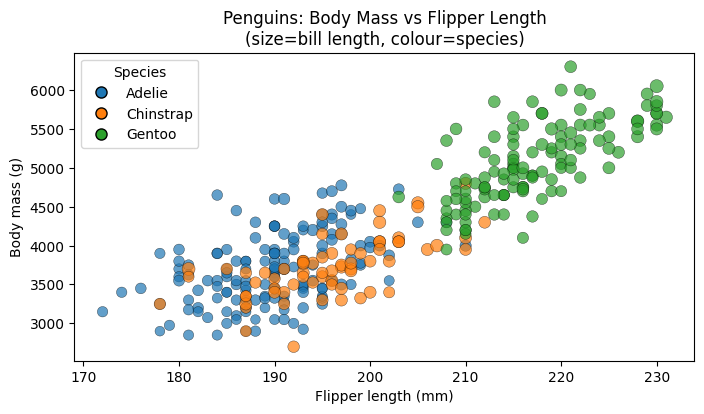

In [7]:
penguins = penguins.dropna(
    subset=["flipper_length_mm", "body_mass_g", "bill_length_mm", "species"]
)

# Map species -> colour manually (Matplotlib expects numeric or explicit colors for 'c')
palette = {"Adelie": "tab:blue", "Chinstrap": "tab:orange", "Gentoo": "tab:green"}
colours = penguins["species"].map(palette)

fig, ax = plt.subplots()
sc = ax.scatter(
    penguins["flipper_length_mm"],
    penguins["body_mass_g"],
    s=penguins["bill_length_mm"] * 1.5, # size encodes bill length
    c=colours,
    alpha=0.7,
    edgecolor="k",
    linewidth=0.3,
)
ax.set_xlabel("Flipper length (mm)")
ax.set_ylabel("Body mass (g)")
ax.set_title("Penguins: Body Mass vs Flipper Length\n(size=bill length, colour=species)")

# Manual legend for species
handles = [plt.Line2D(
    [0],
    [0],
    marker='o',
    color='w',
    markerfacecolor=palette[s],
    markeredgecolor='k',
    markersize=8,
    label=s
) for s in palette]

ax.legend(handles=handles, title="Species", frameon=True)
plt.show()


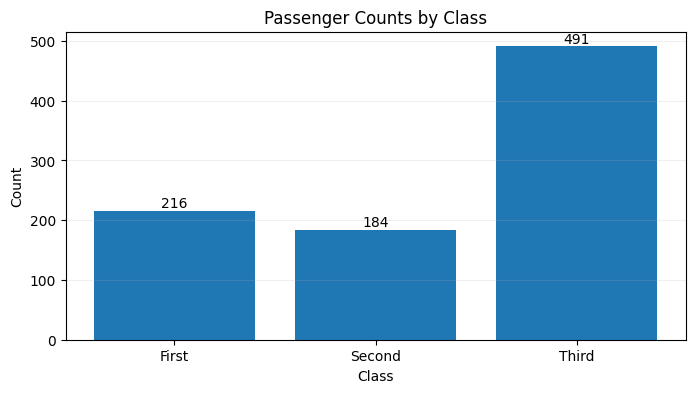

In [8]:
## Bar & Pie

titanic = sns.load_dataset("titanic").dropna(subset=["class"])
counts = titanic["class"].value_counts().sort_index() # first, second, third

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_title("Passenger Counts by Class")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
for i, v in enumerate(counts.values):
    ax.text(i, v, str(v), ha="center", va="bottom")
ax.grid(axis="y", alpha=0.2)
plt.show()

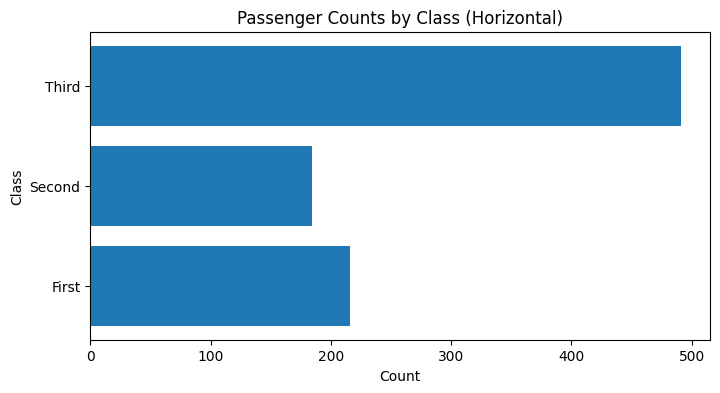

In [9]:
# horizontal variant

fig, ax = plt.subplots()
ax.barh(counts.index, counts.values)
ax.set_title("Passenger Counts by Class (Horizontal)")
ax.set_xlabel("Count")
ax.set_ylabel("Class")
plt.show()


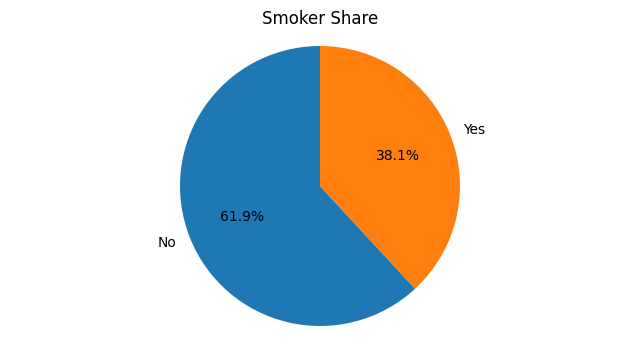

In [10]:
# Pie
tips = sns.load_dataset("tips").dropna(subset=["smoker"])
p = tips["smoker"].value_counts(normalize=True) # proportions

fig, ax = plt.subplots()
ax.pie(p.values, labels=p.index, autopct="%1.1f%%", startangle=90)
ax.set_title("Smoker Share")
ax.axis("equal") # make circle round
plt.show()

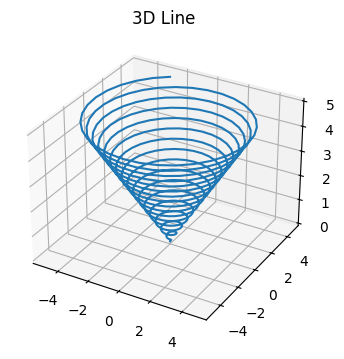

In [22]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z = np.linspace(0, 5, 500)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)

ax.plot3D(x, y, z)
ax.set_title("3D Line")
plt.show()


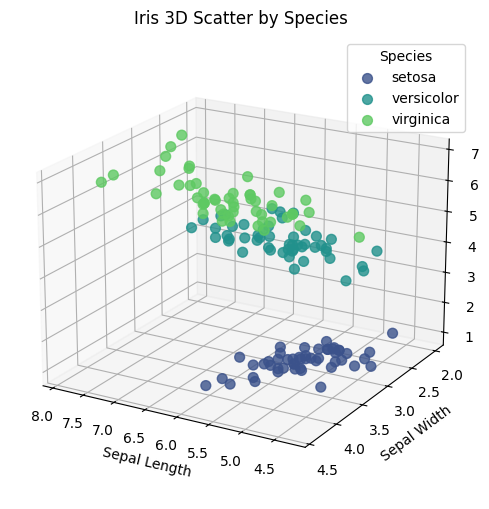

In [23]:
iris = sns.load_dataset("iris")

palette = sns.color_palette("viridis", n_colors=3)
species_unique = iris["species"].unique()
color_map = dict(zip(species_unique, palette))

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection="3d")

for species, color in color_map.items():
    subset = iris[iris["species"] == species]
    ax.scatter(
        subset["sepal_length"],
        subset["sepal_width"],
        subset["petal_length"],
        color=color,
        label=species,
        s=50,
        alpha=0.8
    )

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.set_title("Iris 3D Scatter by Species", pad=10)

ax.legend(title="Species")
ax.view_init(elev=20, azim=120)

plt.show()

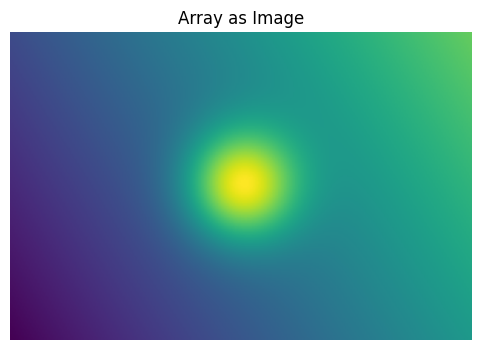

In [25]:
# Image without internet

nx, ny = 200, 300
Y, X = np.mgrid[0:nx, 0:ny]
grad = (X / ny) * 0.7 + (Y / nx) * 0.3
spot = np.exp(-((X - ny / 2)**2 + (Y - nx / 2)**2) / (2*(min(nx, ny) / 8)**2))
img = grad + 0.8 * spot

plt.imshow(img, origin="lower")
plt.title("Array as Image")
plt.axis("off")
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm

# --- Base image setup ---
nx, ny = 200, 300
Y, X = np.mgrid[0:nx, 0:ny]
grad = (X / ny) * 0.7 + (Y / nx) * 0.3

# --- Animation parameters ---
fps = 24
seconds = 10
frames = fps * seconds
Ax, Ay = ny * 0.25, nx * 0.25
wx, wy = 2 * np.pi * 1.0 / seconds, 2 * np.pi * 1.5 / seconds
phase = np.pi / 3
base_sigma = min(nx, ny) / 8
sigma_amp = 0.25
fx, fy = 0.03, 0.028
ripple_amp = 0.08
ripple_speed = 2 * np.pi * 0.6 / seconds
cmap = cm.get_cmap('turbo')

# --- Figure setup ---
fig, ax = plt.subplots(figsize=(7, 4.2))
im = ax.imshow(np.zeros_like(grad), origin="lower", cmap=cmap, vmin=0, vmax=1, aspect='auto')
ax.axis("off")

# --- Frame generator ---
def frame_image(t):
    cx = ny / 2 + Ax * np.sin(wx * t * (2 * np.pi))
    cy = nx / 2 + Ay * np.cos(wy * t * (2 * np.pi) + phase)
    sigma = base_sigma * (1 + sigma_amp * np.sin(2 * np.pi * t))
    denom = 2 * (sigma ** 2)
    spot = np.exp(-((X - cx) ** 2 + (Y - cy) ** 2) / denom)
    ripple_phase = ripple_speed * t * (2 * np.pi)
    ripples = ripple_amp * np.sin(2 * np.pi * (fx * X + fy * Y) + ripple_phase)
    img = grad + 0.8 * spot + ripples
    img = (img - img.min()) / (img.max() - img.min())
    return img

def animate(i):
    t = i / frames
    im.set_data(frame_image(t))
    return (im,)

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=1000/fps, blit=True)

# --- Save the animation locally ---
anim.save("mad_hypnotic_gradient.gif", writer=animation.PillowWriter(fps=fps))
plt.close(fig)

print("Animation Saved")

/var/folders/hd/wvpfmg893d9ff7g872_k6hvh0000gn/T/ipykernel_57132/1399527660.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('turbo')


Animation Saved


- Stateful: `plt.*` modifies the "current" figure/axes
- OO: You hold `fig/ax` refences and call `ax.method(...)`

### Common Gotchas
- "My labels overlap" -> `plt.tight_layout()` or `fig.tight_layout()`
- "Why is my scatter all one colour?" -> `c=` needs numeric or valid colours
- "Why are my points outlined?" -> Matplotlib draws edges by default for some marker setss
use `edgecolor / linewidth', or `marker="."` to taste.
- "Bins?" -> start with 10 - 30; increase to see structure, decrease to avoid noise.
- "Units for `figsize`" -> Inches. Pixel Outout = inches x dpi
- "Order of commands?" -> Compose the plot, then `plt.show()`. If saving `fig.savefig(...)`
before `plt.show()`
- Dealing with NaNs -> Many seaborn datasets(e.g penguins) have `NaN`s. Use `.dropna(subset=[...])`
before plotting those variables.